In [1]:
%load_ext autoreload
%autoreload 2
%run ../src/preamble.py

#### General settings

In [3]:
# number of points
N              = 256

# signal-to-noise ratio
snr            = np.inf

# total duration of the signal
observe        = 20

#### Signal to be analyzed

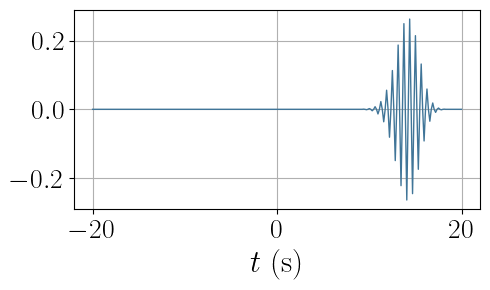

In [5]:
# spherical coordinates parameterizing the coherent state
theta          = 3*np.pi/4
phi            = np.pi/2

# coherent state
signal,time_t  = the_noisy_coherent_state(N,observe = observe, theta = theta, phi = phi, snr = snr)

# display the real part of the signal
time_t         = display_signal(signal,time_t)

#### Common grid of spherical angles on which to compute the Kravchuk transform

In [7]:
(thetas, phis) = the_spherical_angles(N)

#### Original Kravchuk transform

- **Pascal, B.**, & Bardenet, R. (2022). A covariant, discrete time-frequency representation tailored for zero-based signal detection. *IEEE Transactions on Signal Processing*, 70, 2950–2961. [hal-03553433](https://hal.archives-ouvertes.fr/hal-03553433/document)

- **Pascal, B.**, & Bardenet, R. (2022, September). Une famille de représentations covariantes de signaux discrets et son application à la détection de signaux à partir de leurs zéros. *GRETSI’22 XXVIIIème Colloque Francophone De Traitement Du Signal Et Des Images*. [hal-03614725](https://hal.archives-ouvertes.fr/hal-03614725/document)

In [9]:
ti_origin  = time.time()  
Ks, _,_    = the_ptransform(signal,1/2,thetas[:-1],phis)
tf_origin  = time.time()  
dt_origin  = tf_origin - ti_origin

print(f'Elapsed time to compute the original p-Kravchuk transform is {dt_origin:.2f} sec.')

Elapsed time to compute the original p-Kravchuk transform is 2.71 sec.


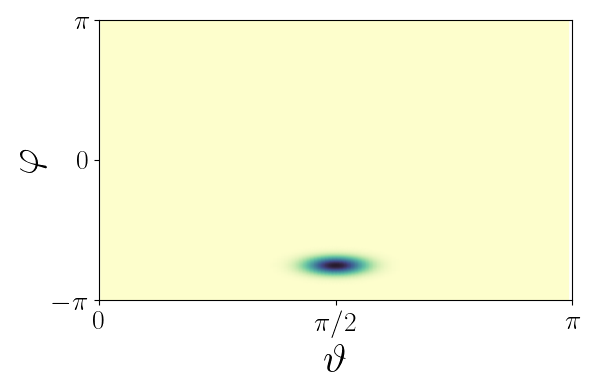

In [10]:
planar_display(np.exp(np.abs(Ks)),[],[],thetas[:-1],phis)

#### Novel aligned Kravchuk transform

- **Pascal, B.**, Flamant, J., & Bardenet, R. (2025). Transformée de Kravchuk réalignée, implémentation efficace et illustration sur signaux élémentaires et réels. *Submitted*. [hal-](https://hal.archives-ouvertes.fr/)

In [12]:
ti_new     = time.time()  
Fs,_,_     = the_new_transform(signal)
tf_new     = time.time()  
dt_new     = tf_new - ti_new

print(f'Elapsed time to compute the novel aligned Kravchuk transform is {dt_new:.2f} sec.')

Elapsed time to compute the novel aligned Kravchuk transform is 0.02 sec.


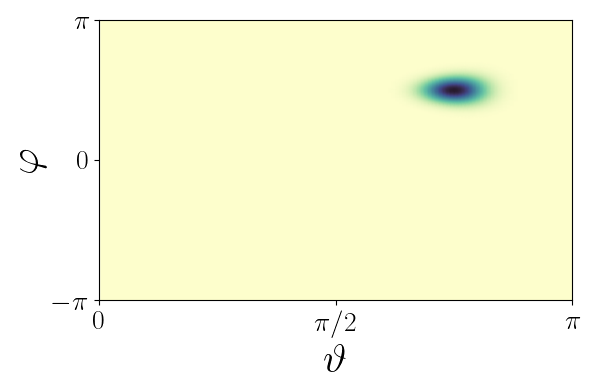

In [13]:
planar_display(np.exp(np.abs(Fs)),[],[],thetas,phis)

#### Rotate a signal

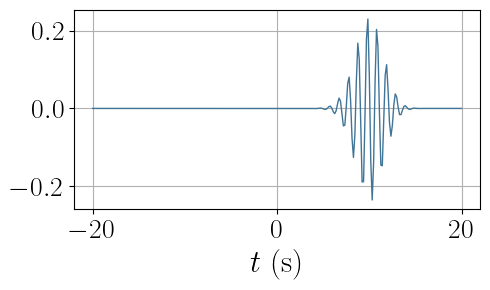

In [15]:
# polar angle of the rotation
theta   = - np.pi / 4

# azimuthal angle of the rotation
phi     = - np.pi

# rotate the signal
rsignal = rotate_signal(signal, theta,  phi)

# display the real part of the rotated signal
time_t         = display_signal(rsignal,time_t)

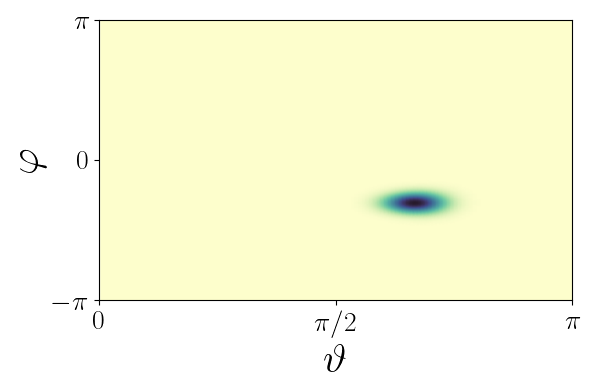

In [28]:
# compute the novel aligned Kravchuk transform of the rotated signal
Rs, thetas, phis = the_new_transform(rsignal)

# display the Kravchuk spectrogram
planar_display(np.exp(np.abs(Rs)),[],[],thetas,phis)

#### Invert the novel aligned Kravchuk transform

In [ ]:
# compute the invert of the Kravchuk transform
isignal = the_inverse_transform(Rs,N)

# display the real part of the inverted signal
time_t         = display_signal(isignal,time_t)

# compute the reconstruction error
err            = np.linalg.norm()